# Recall


As part of supervised learning, prediction from a model can classified into two categories- Regression and Classification.

In Supervised learning system learns from the data that has been provided as tranining and which contains both feature and dependendent variable.  

For example- If we need to predict the Salary of an employee in an organization based on the Training data with some of the features like - Employee's experience, current Salary, Location etc. Organization will also have the data set of salary that they have provided to the hired employees. With this existing set of data System can predict the salary of an employee given the features like current salary, experience etc. This is considered as Regression where the predicted value is quantitive.

Now lets consider the second category Classification, suppose you have to predict the the potenial customer for buying credit card, given salary, age, Gender, past purchasing history and some other feature. If we look carefully the regression module doesn't work here the predicted data is qualitative which means we have to predict whether customer will take credit card or not.(Yes/No). We can have some other qualitative classification like user ratings which can start from very bad to very good(1 to 5) which we can consider as multi-class classification.


As we got some basic understanding now, before we discuss about Recall let's understand Confusion Matrix and it's use in classification.

In the field of machine learning and specifically in case of statistical classification, confusion matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of this matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name has been given to understand to see if the system is confusing two classes (i.e. commonly mislabeling one as another).


In [1]:
from IPython.display import Image

Image(url="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg")

Let's see and example - If we see the below table for spam and non-spam filter of email in a confusion matrix.

In [2]:
Image(url="https://4.bp.blogspot.com/-jNSCuV2OtOY/XMfoQka3qaI/AAAAAAAAEjY/TiFX8HALafAVzu_zp5njDqOoGCqzyVouwCLcBGAs/s1600/1_001%2Bnew.jpg")

Let's understand the terms now - 

True Positive - As the term suggests it's the value of correctly predicted from the actual results.

False Negative - These are the values in the table which predicted false but in actual it's true. For the above example model predicted the email as non-spam but in actual it's a spam. This is called Type 2 error.

False Positive - These are the values in the table which predicted as true but in actual it's false. For the above example model predicted the email as spam but in it actual it's a non-spam. This is called Type 1 error.

True Negative - These are the values in the table which predicted false and in actual it's false. For the above example model predicted the email as non-spam and it's actual it's non-spam.

So normally we check how accurately our model predicted the values, which is called Accuracy - 

Accuracy = $\frac{TP+TN}{TP+FN+FP+TN}$

But accuracy will not always be the reliable metric for the real performance of the model. Because it will lead to misleading results if the data is not balanced. For example of below unbalanced data

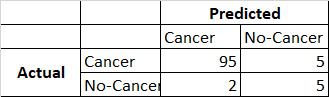

Now for this we get an awesome accuracy of 93%. But is it a good model, the answer is no. Because the model mentioned 5 of the patients has no-cancer where they actually have and need to diagnosed.

Or consider another example - Create a model to identify the terrorist board flights in airport for an year. So if we see the data from 500 milllion passengers only 11 of them are confirmed terrorists. But our prediction model mentioned all of them as not-terrorist. So we get an amazing accuracy of 99.99%. But will anyone buy this model? No way!!!

Because of this unbalanced data we can't rely on accuracy for classification model. Here comes the two metrics which is important Recall and Precision.

Recall/Sensitivity - Recall will be calculated as predicted postive value divided by the actual positive value. Eventually we want to get the answer of the question in what proportion did actual positives are identified correctly by the classifier.

Formula - $\frac{TP}{TP+FN}$

We should always try to get high Recall value, because a model should always try to remove Type-2 error. 

Let's calculate the recall for above SPAM email example - 

R = $\frac{45}{45+20}$ = 69.23% which actually means 69.23% correct emails are classified as Spam and excluded from non-spam emails.

Along with the metrics Recall we should also calculate the value of Precision which is ratio of classified true postive example with total predicted true positive example.

Formula - $\frac{TP}{TP+FP}$

From this two values we will calculate the F1-Score which is actually harmonic mean of Precision and Recall.

Formula - 2*$\frac{Precision*Recall}{Precision+Recall}$

Let's see an example in Python - 

We have a IRIS data set which contains 3 different variety of flower Sentosa, Versicolor and Virginica. With their sepal and petal length and width we will try to draw a confusion matrix and find Recall, Precision, Accuracy and F1 Score.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/MongoDB/Python/iris.csv')
X = dataset.iloc[:, 0:4].values
y = dataset['variety'].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Here is the confusion Matrix\n',cm)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac = accuracy_score(y_test, y_pred)
ps = precision_score(y_test,y_pred, average=None)
rc = recall_score(y_test,y_pred,average=None)
f_sc = f1_score(y_test,y_pred,average=None)

print("Accuracy:{}\nPrecision:{}\nRecall:{}\nF1-Score:{}".format(ac,ps,rc,f_sc))

Here is the confusion Matrix
 [[13  0  0]
 [ 0 10  6]
 [ 0  1  8]]
Accuracy:0.8157894736842105
Precision:[ 1.          0.90909091  0.57142857]
Recall:[ 1.          0.625       0.88888889]
F1-Score:[ 1.          0.74074074  0.69565217]
